Load Libraries

In [1]:
import numpy as np
import pandas as pd

Create Dataset for Timing

In [2]:
timing_dgms = np.empty([10000,5], dtype=object)
for j in range(0,10000):
    three_dgms = []
    six_dgms = []
    ten_dgms = []
    twenty_dgms = []
    forty_dgms = []
    point = [0, 100]
    three_dgms.append(point)
    six_dgms.append(point)
    ten_dgms.append(point)
    twenty_dgms.append(point)
    forty_dgms.append(point)
    for i in range(0,2):
        birth = np.random.randint(0, 100, size=1)
        death = np.random.randint(birth, 100, size=1)
        point = [birth[0], death[0]]
        three_dgms.append(point)
    for i in range(0,5):
        birth = np.random.randint(0, 100, size=1)
        death = np.random.randint(birth, 100, size=1)
        point = [birth[0], death[0]]
        six_dgms.append(point)
    for i in range(0,9):
        birth = np.random.randint(0, 100, size=1)
        death = np.random.randint(birth, 100, size=1)
        point = [birth[0], death[0]]
        ten_dgms.append(point)
    for i in range(0,19):
        birth = np.random.randint(0, 100, size=1)
        death = np.random.randint(birth, 100, size=1)
        point = [birth[0], death[0]]
        twenty_dgms.append(point)
    for i in range(0,39):
        birth = np.random.randint(0, 100, size=1)
        death = np.random.randint(birth, 100, size=1)
        point = [birth[0], death[0]]
        forty_dgms.append(point)
    timing_dgms[j,0]=three_dgms
    timing_dgms[j,1]=six_dgms
    timing_dgms[j,2]=ten_dgms
    timing_dgms[j,3]=twenty_dgms
    timing_dgms[j,4]=forty_dgms
timing_dgms = pd.DataFrame(timing_dgms)
timing_dgms.columns = ['Length 3 dgms', 'Length 6 dgms', 'Length 10 dgms', 'Length 20 dgms', 'Length 40 dgms']
timing_dgms

,Length 3 dgms,Length 6 dgms,Length 10 dgms,Length 20 dgms,Length 40 dgms
0,"[[0, 100], [94, 99], [91, 96]]","[[0, 100], [39, 46], [21, 55], [63, 69], [92, ...","[[0, 100], [13, 70], [22, 79], [72, 76], [71, ...","[[0, 100], [42, 50], [46, 94], [29, 96], [24, ...","[[0, 100], [70, 80], [17, 77], [99, 99], [15, ..."
1,"[[0, 100], [33, 69], [95, 96]]","[[0, 100], [56, 72], [25, 47], [99, 99], [43, ...","[[0, 100], [73, 79], [47, 84], [43, 74], [17, ...","[[0, 100], [2, 45], [51, 57], [99, 99], [34, 8...","[[0, 100], [81, 82], [59, 82], [4, 66], [16, 6..."
2,"[[0, 100], [47, 76], [73, 78]]","[[0, 100], [33, 85], [34, 62], [27, 93], [12, ...","[[0, 100], [10, 58], [44, 61], [25, 48], [56, ...","[[0, 100], [85, 95], [6, 10], [22, 31], [39, 8...","[[0, 100], [39, 52], [80, 88], [91, 93], [86, ..."
3,"[[0, 100], [88, 91], [54, 62]]","[[0, 100], [82, 94], [5, 46], [93, 98], [70, 7...","[[0, 100], [75, 87], [42, 72], [73, 81], [63, ...","[[0, 100], [66, 87], [23, 53], [13, 16], [29, ...","[[0, 100], [56, 95], [24, 26], [61, 62], [32, ..."
4,"[[0, 100], [60, 83], [17, 17]]","[[0, 100], [37, 60], [54, 96], [88, 97], [72, ...","[[0, 100], [53, 57], [75, 81], [80, 80], [55, ...","[[0, 100], [38, 98], [38, 46], [14, 45], [87, ...","[[0, 100], [79, 82], [82, 97], [83, 83], [94, ..."
...,...,...,...,...,...
9995,"[[0, 100], [59, 92], [15, 95]]","[[0, 100], [47, 83], [57, 59], [53, 63], [52, ...","[[0, 100], [82, 82], [10, 82], [70, 95], [51, ...","[[0, 100], [11, 74], [26, 43], [51, 59], [50, ...","[[0, 100], [70, 89], [32, 49], [50, 85], [95, ..."
9996,"[[0, 100], [1, 41], [92, 99]]","[[0, 100], [36, 37], [90, 96], [88, 88], [60, ...","[[0, 100], [80, 81], [38, 74], [62, 97], [33, ...","[[0, 100], [99, 99], [40, 95], [10, 82], [36, ...","[[0, 100], [37, 54], [30, 92], [4, 77], [67, 8..."
9997,"[[0, 100], [7, 22], [12, 36]]","[[0, 100], [33, 40], [28, 97], [3, 16], [57, 6...","[[0, 100], [75, 76], [76, 95], [37, 60], [27, ...","[[0, 100], [7, 65], [15, 57], [7, 61], [34, 67...","[[0, 100], [24, 45], [61, 62], [57, 75], [73, ..."
9998,"[[0, 100], [74, 81], [69, 76]]","[[0, 100], [63, 92], [19, 62], [42, 49], [49, ...","[[0, 100], [20, 54], [79, 93], [75, 79], [93, ...","[[0, 100], [50, 72], [16, 48], [13, 77], [66, ...","[[0, 100], [28, 52], [97, 97], [21, 76], [25, ..."


### Choose Dimension for Timing Test

In [3]:
dgms_3 = timing_dgms['Length 3 dgms']
dgms_6 = timing_dgms['Length 6 dgms']
dgms_10 = timing_dgms['Length 10 dgms']
dgms_20 = timing_dgms['Length 20 dgms']
dgms_40 = timing_dgms['Length 40 dgms']

### Load original persistence images method function from teaspoon and update for parallel flag

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from persim import PersistenceImager
from math import pi

def F_Image(PD1, PS, var, plot, D_Img=[], pers_imager=None, training=True, parallel=False):
    
    output = {}
    # number of persistence diagrams
    N1 = len(PD1)

    if training == True:
        # adjust the image parameters and compute images
        pers_imager = PersistenceImager()
        pers_imager.pixel_size = PS
        pers_imager.kernel_params = {'sigma': var}

        PDs = PD1.tolist()
        pers_imager.fit(PDs, skew=True)
        if parallel==True:
            pers_img = pers_imager.transform(PD1, skew=True, n_jobs=-1)
        else:
            pers_img = pers_imager.transform(PD1, skew=True)
    else:
        pers_img = [pers_imager.transform(PD1[i], skew=True) for i in np.arange(0, N1, 1)]

    # generate feature matrix
    feature_PI = np.zeros(
        (N1, len(pers_img[0][:, 0])*len(pers_img[0][0, :])))
    for i in range(N1):
        feature_PI[i, :] = pers_img[i].flatten()

    # plot all images or images of certain persistence diagrams
    if plot == True:
        fig = []
        if D_Img == []:
            D_Img = np.arange(1, 2, 1)
        for i in range(len(D_Img)):
            plt.figure()
            ax = plt.gca()
            pimgr = PersistenceImager()
            pimgr.pixel_size = PS
            pimgr.kernel_params = {'sigma': var}
            pimgr.fit(PD1[D_Img[i]-1], skew=True)
            imgs = pimgr.transform(PD1[D_Img[i]-1], skew=True)
            pers_imager.plot_image(imgs, ax)
            fig.append(plt.gcf())
        output['figures'] = fig

    output['F_Matrix'] = feature_PI
    output['pers_imager'] = pers_imager

    return output

Test Initial Timings for Parallel Performance

In [5]:
dgms_3_train = dgms_3[0:10]
%timeit output0 = F_Image(dgms_3_train, PS=1, var=2, plot=False, training=True)
%timeit output0 = F_Image(dgms_3_train, PS=1, var=2, plot=False, training=True, parallel=True)

2.78 ms ± 74.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.04 ms ± 1.91 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
dgms_train = dgms_20[0:10]
%timeit output0 = F_Image(dgms_train, PS=1, var=2, plot=False, training=True)
%timeit output0 = F_Image(dgms_train, PS=1, var=2, plot=False, training=True, parallel=True)

14.5 ms ± 53.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.7 ms ± 122 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
dgms_train = dgms_20[0:20]
%timeit output0 = F_Image(dgms_train, PS=1, var=2, plot=False, training=True)
%timeit output0 = F_Image(dgms_train, PS=1, var=2, plot=False, training=True, parallel=True)

30.1 ms ± 938 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
20 ms ± 2.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
dgms_train = dgms_20[0:50]
%timeit output0 = F_Image(dgms_train, PS=1, var=2, plot=False, training=True)
%timeit output0 = F_Image(dgms_train, PS=1, var=2, plot=False, training=True, parallel=True)

75.1 ms ± 2.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
40.3 ms ± 304 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
dgms_train = dgms_40[0:20]
%timeit output0 = F_Image(dgms_train, PS=1, var=2, plot=False, training=True)
%timeit output0 = F_Image(dgms_train, PS=1, var=2, plot=False, training=True, parallel=True)

57.9 ms ± 1.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
26.5 ms ± 1.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Timing with simulated Datasets

20 Diagrams, Pixel Size 1

In [12]:
import time
seed = [0,1,2,3,4]
train_size = [25, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300,1500, 2000, 2500, 3000]
n = len(train_size)
dgm20_timing = np.zeros((n,3))
for i in range(0,n):
    for j in seed:
        dgms_train = dgms_20[0:train_size[i]]
        xdgm0_train = np.array(dgms_train)
        dgm20_timing[i,0] += len(xdgm0_train)

        start = time.time()
        output = F_Image(xdgm0_train, PS=1, var=1, plot=False, training=True, parallel=True)
        end = time.time()-start
        dgm20_timing[i,1] +=end

        start = time.time()
        output = F_Image(xdgm0_train, PS=1, var=1, plot=False, training=True)
        end = time.time()-start
        dgm20_timing[i,2] +=end

    print("Finished Training ", i)
dgm20_timing = pd.DataFrame(dgm20_timing/5)
dgm20_timing.columns=['Observations', 'Parallel (8 cores)', 'Single Core']
print(dgm20_timing)

Finished Training  0
Finished Training  1
Finished Training  2
Finished Training  3
Finished Training  4
Finished Training  5
Finished Training  6
Finished Training  7
Finished Training  8
Finished Training  9
Finished Training  10
Finished Training  11
Finished Training  12
Finished Training  13
Finished Training  14
Finished Training  15
Finished Training  16
Finished Training  17
    Observations  Parallel (8 cores)  Single Core
0           25.0            0.031215     0.038112
1          100.0            0.082298     0.148205
2          200.0            0.153193     0.299534
3          300.0            0.223720     0.453353
4          400.0            0.290559     0.665328
5          500.0            0.342204     0.750656
6          600.0            0.429749     0.949097
7          700.0            0.520311     1.114137
8          800.0            0.563282     1.260796
9          900.0            0.642430     1.349435
10        1000.0            0.704488     1.510952
11        1100

Text(0.5, 1.0, 'Simulated Data - Pixel Size 1')

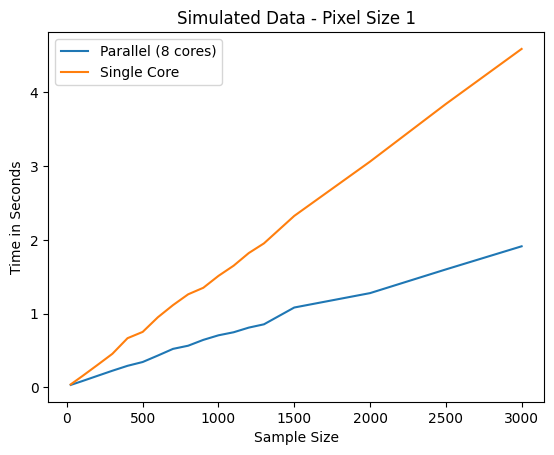

In [13]:
t = dgm20_timing.plot(x='Observations')
t.set_xlabel("Sample Size")
t.set_ylabel("Time in Seconds")
t.set_title("Simulated Data - Pixel Size 1")

20 Diagrams, Pixel Size 2

In [16]:
import time
seed = [0,1,2,3,4]
train_size = [25, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300,1500, 2000, 2500, 3000]
n = len(train_size)
dgm20_timing = np.zeros((n,3))
for i in range(0,n):
    for j in seed:
        dgms_train = dgms_20[0:train_size[i]]
        xdgm0_train = np.array(dgms_train)
        dgm20_timing[i,0] += len(xdgm0_train)

        start = time.time()
        output = F_Image(xdgm0_train, PS=2, var=1, plot=False, training=True, parallel=True)
        end = time.time()-start
        dgm20_timing[i,1] +=end

        start = time.time()
        output = F_Image(xdgm0_train, PS=2, var=1, plot=False, training=True)
        end = time.time()-start
        dgm20_timing[i,2] +=end

    print("Finished Training ", i)
dgm20_timing = pd.DataFrame(dgm20_timing/5)
dgm20_timing.columns=['Observations', 'Parallel (8 cores)', 'Single Core']
print(dgm20_timing)

Finished Training  0
Finished Training  1
Finished Training  2
Finished Training  3
Finished Training  4
Finished Training  5
Finished Training  6
Finished Training  7
Finished Training  8
Finished Training  9
Finished Training  10
Finished Training  11
Finished Training  12
Finished Training  13
Finished Training  14
Finished Training  15
Finished Training  16
Finished Training  17
    Observations  Parallel (8 cores)  Single Core
0           25.0            0.028637     0.020101
1          100.0            0.052187     0.077009
2          200.0            0.086902     0.150395
3          300.0            0.143985     0.224366
4          400.0            0.150181     0.301705
5          500.0            0.165807     0.374072
6          600.0            0.230946     0.444133
7          700.0            0.272017     0.519014
8          800.0            0.263668     0.595185
9          900.0            0.326762     0.657159
10        1000.0            0.332049     0.743422
11        1100

Text(0.5, 1.0, 'Simulated Data - Pixel Size 2')

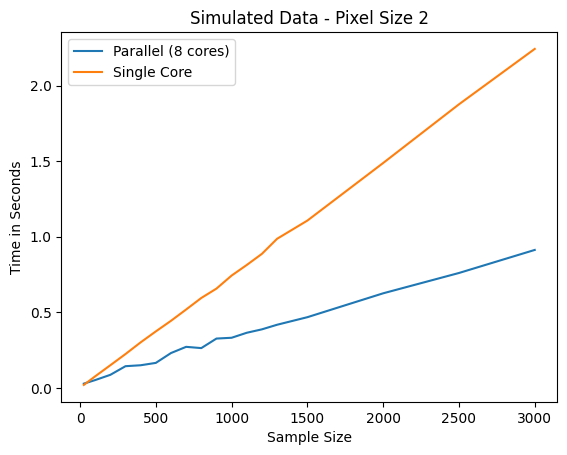

In [17]:
t = dgm20_timing.plot(x='Observations')
t.set_xlabel("Sample Size")
t.set_ylabel("Time in Seconds")
t.set_title("Simulated Data - Pixel Size 2")

In [20]:
import time
seed = [0,1,2]
train_size = [25, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300,1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
n = len(train_size)
dgm20_timing = np.zeros((n,3))
for i in range(0,n):
    for j in seed:
        dgms_train = dgms_20[0:train_size[i]]
        xdgm0_train = np.array(dgms_train)
        dgm20_timing[i,0] += len(xdgm0_train)

        start = time.time()
        output = F_Image(xdgm0_train, PS=.5, var=1, plot=False, training=True, parallel=True)
        end = time.time()-start
        dgm20_timing[i,1] +=end
        print("parallel done")

        start = time.time()
        output = F_Image(xdgm0_train, PS=.5, var=1, plot=False, training=True)
        end = time.time()-start
        dgm20_timing[i,2] +=end
        print("serial done")

    print("Finished Training ", i)
dgm20_timing = pd.DataFrame(dgm20_timing/3)
dgm20_timing.columns=['Observations', 'Parallel (8 cores)', 'Single Core']
print(dgm20_timing)

parallel done
serial done
parallel done
serial done
parallel done
serial done
Finished Training  0
parallel done
serial done
parallel done
serial done
parallel done
serial done
Finished Training  1
parallel done
serial done
parallel done
serial done
parallel done
serial done
Finished Training  2
parallel done
serial done
parallel done
serial done
parallel done
serial done
Finished Training  3
parallel done
serial done
parallel done
serial done
parallel done
serial done
Finished Training  4
parallel done
serial done
parallel done
serial done
parallel done
serial done
Finished Training  5
parallel done
serial done
parallel done
serial done
parallel done
serial done
Finished Training  6
parallel done
serial done
parallel done
serial done
parallel done
serial done
Finished Training  7
parallel done
serial done
parallel done
serial done
parallel done
serial done
Finished Training  8
parallel done
serial done
parallel done
serial done
parallel done
serial done
Finished Training  9
parallel d

Text(0.5, 1.0, 'Simulated Data - Pixel Size .5')

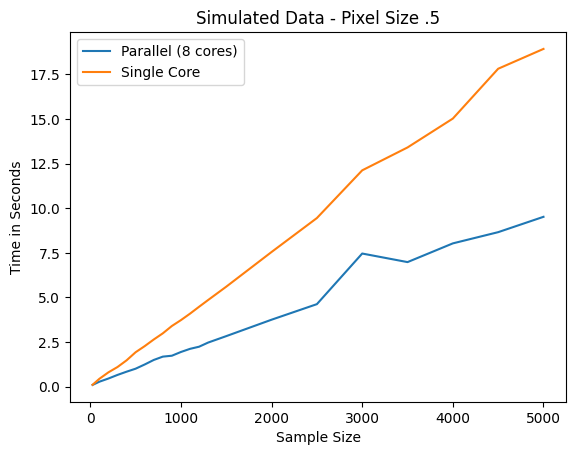

In [21]:
t = dgm20_timing.plot(x='Observations')
t.set_xlabel("Sample Size")
t.set_ylabel("Time in Seconds")
t.set_title("Simulated Data - Pixel Size .5")

In [28]:
import time
seed = [0,1,2,3,4,5]
train_size = [25, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300,1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
n = len(train_size)
dgm20_timing = np.zeros((n,3))
for i in range(0,n):
    for j in seed:
        dgms_train = dgms_20[0:train_size[i]]
        xdgm0_train = np.array(dgms_train)
        dgm20_timing[i,0] += len(xdgm0_train)

        start = time.time()
        output = F_Image(xdgm0_train, PS=.2, var=1, plot=False, training=True, parallel=True)
        end = time.time()-start
        dgm20_timing[i,1] +=end
        print('parallel done')

        start = time.time()
        output = F_Image(xdgm0_train, PS=.2, var=1, plot=False, training=True)
        end = time.time()-start
        dgm20_timing[i,2] +=end
        print('serial done')

    print("Finished Training ", i)
dgm20_timing = pd.DataFrame(dgm20_timing/5)
dgm20_timing.columns=['Observations', 'Parallel (8 cores)', 'Single Core']
print(dgm20_timing)

parallel done
serial done
Finished Training  0
parallel done
serial done
Finished Training  1
parallel done
serial done
Finished Training  2
parallel done
serial done
Finished Training  3
parallel done
serial done
Finished Training  4
parallel done
serial done
Finished Training  5
parallel done
serial done
Finished Training  6
parallel done
serial done
Finished Training  7
parallel done
serial done
Finished Training  8
parallel done
serial done
Finished Training  9
parallel done
serial done
Finished Training  10
parallel done
serial done
Finished Training  11
parallel done
serial done
Finished Training  12
parallel done
serial done
Finished Training  13
parallel done
serial done
Finished Training  14
parallel done
serial done
Finished Training  15
parallel done
serial done
Finished Training  16
parallel done
serial done
Finished Training  17
parallel done
serial done
Finished Training  18
parallel done
serial done
Finished Training  19
parallel done
serial done
Finished Training  20
pa

Text(0.5, 1.0, 'Simulated Data - Pixel Size .2')

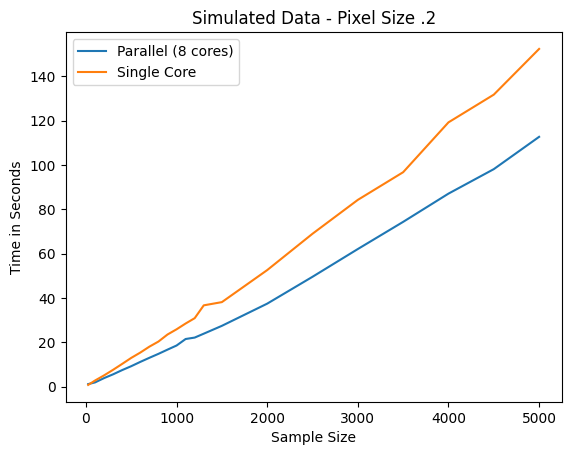

In [29]:
t = dgm20_timing.plot(x='Observations')
t.set_xlabel("Sample Size")
t.set_ylabel("Time in Seconds")
t.set_title("Simulated Data - Pixel Size .2")

Timing for 3 Diagrams

In [55]:
import time
seed = [0,1,2,3,4]
train_size = [25, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300,1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
n = len(train_size)
dgm3_timing = np.zeros((n,3))
for i in range(0,n):
    for j in seed:
        dgms_train = dgms_3[0:train_size[i]]
        xdgm0_train = np.array(dgms_train)
        dgm3_timing[i,0] += len(xdgm0_train)

        start = time.time()
        output = F_Image(xdgm0_train, PS=1, var=1, plot=False, training=True, parallel=True)
        end = time.time()-start
        dgm3_timing[i,1] +=end

        start = time.time()
        output = F_Image(xdgm0_train, PS=1, var=1, plot=False, training=True)
        end = time.time()-start
        dgm3_timing[i,2] +=end

    print("Finished Training ", i)
dgm3_timing = pd.DataFrame(dgm3_timing/5)
dgm3_timing.columns=['Observations', 'Parallel (8 cores)', 'Single Core']
print(dgm3_timing)

Finished Training  0
Finished Training  1
Finished Training  2
Finished Training  3
Finished Training  4
Finished Training  5
Finished Training  6
Finished Training  7
Finished Training  8
Finished Training  9
Finished Training  10
Finished Training  11
Finished Training  12
Finished Training  13
Finished Training  14
Finished Training  15
Finished Training  16
Finished Training  17
Finished Training  18
Finished Training  19
Finished Training  20
Finished Training  21
    Observations  Parallel (8 cores)  Single Core
0           25.0            0.027259     0.009616
1          100.0            0.038945     0.024428
2          200.0            0.071101     0.062296
3          300.0            0.109928     0.080847
4          400.0            0.133380     0.122507
5          500.0            0.161403     0.137116
6          600.0            0.186813     0.175999
7          700.0            0.211194     0.191098
8          800.0            0.231807     0.214995
9          900.0          

Text(0.5, 1.0, 'Simulated Data - Pixel Size 1')

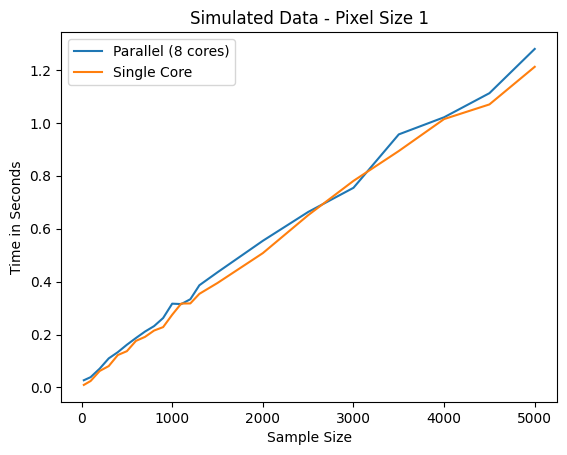

In [56]:
t = dgm3_timing.plot(x='Observations')
t.set_xlabel("Sample Size")
t.set_ylabel("Time in Seconds")
t.set_title("Simulated Data - Pixel Size 1")

3 Diagrams Pixel Size 2

In [57]:
import time
seed = [0,1,2,3,4]
train_size = [25, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300,1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
n = len(train_size)
dgm3_timing = np.zeros((n,3))
for i in range(0,n):
    for j in seed:
        dgms_train = dgms_3[0:train_size[i]]
        xdgm0_train = np.array(dgms_train)
        dgm3_timing[i,0] += len(xdgm0_train)

        start = time.time()
        output = F_Image(xdgm0_train, PS=2, var=1, plot=False, training=True, parallel=True)
        end = time.time()-start
        dgm3_timing[i,1] +=end

        start = time.time()
        output = F_Image(xdgm0_train, PS=2, var=1, plot=False, training=True)
        end = time.time()-start
        dgm3_timing[i,2] +=end

    print("Finished Training ", i)
dgm3_timing = pd.DataFrame(dgm3_timing/5)
dgm3_timing.columns=['Observations', 'Parallel (8 cores)', 'Single Core']
print(dgm3_timing)

Finished Training  0
Finished Training  1
Finished Training  2
Finished Training  3
Finished Training  4
Finished Training  5
Finished Training  6
Finished Training  7
Finished Training  8
Finished Training  9
Finished Training  10
Finished Training  11
Finished Training  12
Finished Training  13
Finished Training  14
Finished Training  15
Finished Training  16
Finished Training  17
Finished Training  18
Finished Training  19
Finished Training  20
Finished Training  21
    Observations  Parallel (8 cores)  Single Core
0           25.0            0.016157     0.002437
1          100.0            0.024377     0.008101
2          200.0            0.030420     0.014421
3          300.0            0.042217     0.021374
4          400.0            0.054999     0.028225
5          500.0            0.052268     0.034873
6          600.0            0.071680     0.042929
7          700.0            0.078308     0.049006
8          800.0            0.079734     0.055650
9          900.0          

Text(0.5, 1.0, 'Simulated Data - Pixel Size 2')

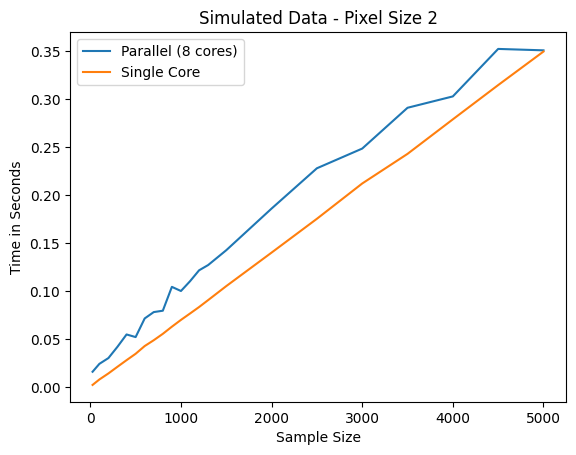

In [58]:
t = dgm3_timing.plot(x='Observations')
t.set_xlabel("Sample Size")
t.set_ylabel("Time in Seconds")
t.set_title("Simulated Data - Pixel Size 2")

Pixel size .5

In [61]:
import time
seed = [0,1,2,3,4]
train_size = [25, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300,1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
n = len(train_size)
dgm3_timing = np.zeros((n,3))
for i in range(0,n):
    for j in seed:
        dgms_train = dgms_3[0:train_size[i]]
        xdgm0_train = np.array(dgms_train)
        dgm3_timing[i,0] += len(xdgm0_train)

        start = time.time()
        output = F_Image(xdgm0_train, PS=.5, var=1, plot=False, training=True, parallel=True)
        end = time.time()-start
        dgm3_timing[i,1] +=end

        start = time.time()
        output = F_Image(xdgm0_train, PS=.5, var=1, plot=False, training=True)
        end = time.time()-start
        dgm3_timing[i,2] +=end

    print("Finished Training ", i)
dgm3_timing = pd.DataFrame(dgm3_timing/5)
dgm3_timing.columns=['Observations', 'Parallel (8 cores)', 'Single Core']
print(dgm3_timing)

Finished Training  0
Finished Training  1
Finished Training  2
Finished Training  3
Finished Training  4
Finished Training  5
Finished Training  6
Finished Training  7
Finished Training  8
Finished Training  9
Finished Training  10
Finished Training  11
Finished Training  12
Finished Training  13
Finished Training  14
Finished Training  15
Finished Training  16
Finished Training  17
Finished Training  18
Finished Training  19
Finished Training  20
Finished Training  21
    Observations  Parallel (8 cores)  Single Core
0           25.0            0.038715     0.014619
1          100.0            0.118346     0.058079
2          200.0            0.225416     0.115787
3          300.0            0.309723     0.171517
4          400.0            0.424625     0.215189
5          500.0            0.526606     0.267556
6          600.0            0.575984     0.315687
7          700.0            0.696903     0.382290
8          800.0            0.748953     0.422506
9          900.0          

Text(0.5, 1.0, 'Simulated Data - Pixel Size .5')

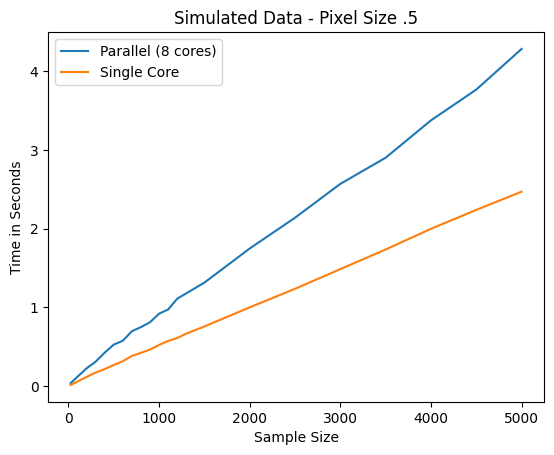

In [62]:
t = dgm3_timing.plot(x='Observations')
t.set_xlabel("Sample Size")
t.set_ylabel("Time in Seconds")
t.set_title("Simulated Data - Pixel Size .5")

Pixel Size .1

In [30]:
import time
seed = [0,1,2,3,4]
train_size = [25, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300,1500, 2000, 2500, 3000, 3500, 4000] #, 4500, 5000]
n = len(train_size)
dgm3_timing = np.zeros((n,3))
for i in range(0,n):
    for j in seed:
        dgms_train = dgms_3[0:train_size[i]]
        xdgm0_train = np.array(dgms_train)
        dgm3_timing[i,0] += len(xdgm0_train)

        start = time.time()
        output = F_Image(xdgm0_train, PS=.1, var=1, plot=False, training=True, parallel=True)
        end = time.time()-start
        dgm3_timing[i,1] +=end

        start = time.time()
        output = F_Image(xdgm0_train, PS=.1, var=1, plot=False, training=True)
        end = time.time()-start
        dgm3_timing[i,2] +=end

    print("Finished Training ", i)
dgm3_timing = pd.DataFrame(dgm3_timing/5)
dgm3_timing.columns=['Observations', 'Parallel (8 cores)', 'Single Core']
print(dgm3_timing)

Finished Training  0
Finished Training  1
Finished Training  2
Finished Training  3
Finished Training  4
Finished Training  5
Finished Training  6
Finished Training  7
Finished Training  8
Finished Training  9
Finished Training  10
Finished Training  11
Finished Training  12
Finished Training  13
Finished Training  14
Finished Training  15
Finished Training  16


KeyboardInterrupt: 

    Observations  Parallel (8 cores)  Single Core
0           25.0            1.068622     0.738120
1          100.0            3.539966     3.101935
2          200.0            6.586979     6.344933
3          300.0           10.287611     8.995662
4          400.0           13.237203    12.407466
5          500.0           16.372516    15.823632
6          600.0           20.511542    19.518096
7          700.0           24.519391    22.093696
8          800.0           29.173534    26.473412
9          900.0           32.192968    31.715583
10        1000.0           41.632554    33.913787
11        1100.0           47.784635    38.086028
12        1200.0           50.169196    43.934697
13        1300.0           51.792809    51.897337
14        1500.0          440.887122    83.211609
15        2000.0          730.154650   283.678779


Text(0.5, 1.0, 'Simulated Data - Pixel Size .5')

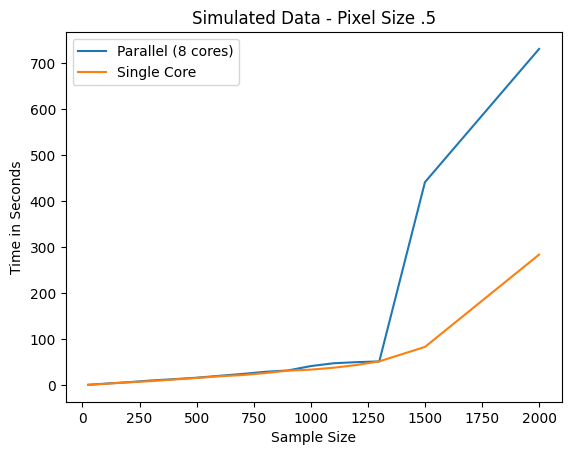

In [38]:
dgm3_timing = pd.DataFrame(dgm3_timing/5)
dgm3_timing.columns=['Observations', 'Parallel (8 cores)', 'Single Core']
print(dgm3_timing[0:16])
t = dgm3_timing[0:16].plot(x='Observations')
t.set_xlabel("Sample Size")
t.set_ylabel("Time in Seconds")
t.set_title("Simulated Data - Pixel Size .5")

In [11]:
def reshape_persistence_diagrams(dgm):
    dgm_reshape = np.array([])
    num_dgms = len(dgm)
    for i in range(0,num_dgms):
        t = np.repeat(i, len(dgm[i]))
        t = t.reshape(len(dgm[i]),1)
        t1 = np.concatenate((t,dgm[i]),1)
        if i == 0:
            dgm_reshape = t1
        else:
            dgm_reshape = np.append(dgm_reshape, t1, 0)
    dummy = np.zeros((num_dgms))
    return dgm_reshape, num_dgms, dummy

In [19]:
from numba import jit
@jit(nopython=True, parallel=True)
def pers_reshape_par(dgms):
    n = dgms[1].shape[0]
    m = dgms[1].shape[1]
    r = len(dgms)
    result = np.zeros((r, n*m))
    for i in range(0,r):
        for j in range(0,n):
            for k in range(0,m):
                result[i, k+m*j] = dgms[i][j][k]
    return result 

In [20]:
from numba import jit
@jit(nopython=True)
def pers_reshape(dgms):
    n = dgms[1].shape[0]
    m = dgms[1].shape[1]
    r = len(dgms)
    result = np.zeros((r, n*m))
    for i in range(0,r):
        for j in range(0,n):
            for k in range(0,m):
                result[i, k+m*j] = dgms[i][j][k]
    return result 

In [11]:
from numba import vectorize
@vectorize
def pers_reshape_vec(dgms):
    n = dgms[1].shape[0]
    m = dgms[1].shape[1]
    r = len(dgms)
    result = np.zeros((r, n*m))
    for i in range(0,r):
        for j in range(0,n):
            for k in range(0,m):
                result[i, k+m*j] = dgms[i][j][k] 

In [12]:

def pers_reshape(dgms):
    n = dgms[1].shape[0]
    m = dgms[1].shape[1]
    r = len(dgms)
    return np.reshape(dgms, (r, n+m))

In [1422]:
import time
import multiprocessing
cpu_count = multiprocessing.cpu_count()
pers_imager = PersistenceImager()
pers_imager.pixel_size = .1
pers_imager.kernel_params = {'sigma': 1}
seed = [0,1,2,3,4]
train_size = [25, 100, 200, 300, 500]
n = len(train_size)
timing = np.zeros((n,4))
for i in range(0,n):
    for j in seed:
        print("Seed is: ", j)
        dgms_train, dgms_test = train_test_split_sklearn(mnist, 'labels', train_size = train_size[i], seed=j)
        xdgm0_train = np.array(dgms_train['zero_dim_rtl'])
        timing[i,0] += len(xdgm0_train)
        print("Done with sampling")

        start = time.time()
        output = F_Image_parallel(xdgm0_train, PS=.1, var=1, plot=False, training=True)
        end = time.time()-start
        timing[i,1] +=end
        print("Done with parallel")

        start = time.time()
        pers_imager.fit(xdgm0_train)
        X_train_features = np.array(pers_imager.transform(xdgm0_train))
        X_train_features = pers_reshape(X_train_features)
        end = time.time()-start
        timing[i,2] +=end
        print("Done with serial")

        start = time.time()
        output = F_Image(xdgm0_train, PS=.1, var=1, plot=False, training=True)
        end = time.time()-start
        timing[i,3] +=end
        print("Done with original")

    print("Finished Training ", i)
timing = pd.DataFrame(timing/5)
timing.columns=['Observations', 'Parallel (8 cores)', 'Single Core', 'Prior Function']
print(timing)

Seed is:  0
Done with sampling
Done with parallel
Done with serial
Done with original
Seed is:  1
Done with sampling
Done with parallel
Done with serial
Done with original
Seed is:  2
Done with sampling
Done with parallel
Done with serial
Done with original
Seed is:  3
Done with sampling
Done with parallel
Done with serial
Done with original
Seed is:  4
Done with sampling
Done with parallel
Done with serial
Done with original
Finished Training  0
Seed is:  0
Done with sampling
Done with parallel
Done with serial
Done with original
Seed is:  1
Done with sampling
Done with parallel
Done with serial
Done with original
Seed is:  2
Done with sampling
Done with parallel
Done with serial
Done with original
Seed is:  3
Done with sampling
Done with parallel
Done with serial
Done with original
Seed is:  4
Done with sampling
Done with parallel
Done with serial
Done with original
Finished Training  1
Seed is:  0
Done with sampling
Done with parallel
Done with serial
Done with original
Seed is:  1


Text(0, 0.5, 'Time in Seconds')

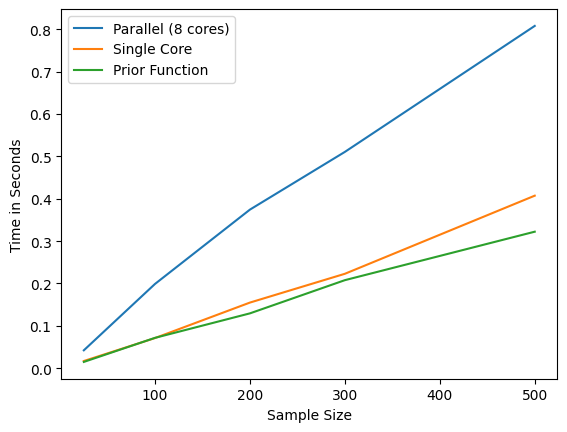

In [1423]:
t = timing.plot(x='Observations')
t.set_xlabel("Sample Size")
t.set_ylabel("Time in Seconds")

In [1434]:
import time
import multiprocessing
cpu_count = multiprocessing.cpu_count()
pers_imager = PersistenceImager()
pers_imager.pixel_size = 1
pers_imager.kernel_params = {'sigma': 1}
seed = [0,1,2,3,4]
train_size = [25, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
n = len(train_size)
timing = np.zeros((n,5))
for i in range(0,n):
    for j in seed:
        print("Seed is: ", j)
        dgms_train = dgms_20[0:train_size[i]]
        xdgm0_train = np.array(dgms_train)
        timing[i,0] += len(xdgm0_train)
        print("Done with sampling")

        start = time.time()
        output = F_Image_parallel(xdgm0_train, PS=1, var=1, plot=False, training=True)
        end = time.time()-start
        timing[i,1] +=end
        print("Done with parallel (original)")

        start = time.time()
        pers_imager.fit(xdgm0_train)
        X_train_features = np.array(pers_imager.transform(xdgm0_train))
        X_train_features = pers_reshape(X_train_features)
        end = time.time()-start
        timing[i,2] +=end
        print("Done with serial")

        start = time.time()
        output = F_Image(xdgm0_train, PS=1, var=1, plot=False, training=True)
        end = time.time()-start
        timing[i,3] +=end
        print("Done with original")

        start = time.time()
        pers_imager.fit(xdgm0_train)
        X_train_features = np.array(pers_imager.transform(xdgm0_train, n_jobs=8))
        X_train_features = pers_reshape(X_train_features)
        end = time.time()-start
        timing[i,4] +=end
        print("Done with parallel")

    print("Finished Training ", i)
timing = pd.DataFrame(timing/5)
timing.columns=['Observations', 'Parallel (8 cores)', 'Single Core', 'Prior Function', 'Parallel New Function']
print(timing)

Seed is:  0
Done with sampling
Done with parallel (original)
Done with serial
Done with original
Done with parallel
Seed is:  1
Done with sampling
Done with parallel (original)
Done with serial
Done with original
Done with parallel
Seed is:  2
Done with sampling
Done with parallel (original)
Done with serial
Done with original
Done with parallel
Seed is:  3
Done with sampling
Done with parallel (original)
Done with serial
Done with original
Done with parallel
Seed is:  4
Done with sampling
Done with parallel (original)
Done with serial
Done with original
Done with parallel
Finished Training  0
Seed is:  0
Done with sampling
Done with parallel (original)
Done with serial
Done with original
Done with parallel
Seed is:  1
Done with sampling
Done with parallel (original)
Done with serial
Done with original
Done with parallel
Seed is:  2
Done with sampling
Done with parallel (original)
Done with serial
Done with original
Done with parallel
Seed is:  3
Done with sampling
Done with parallel (

Text(0, 0.5, 'Time in Seconds')

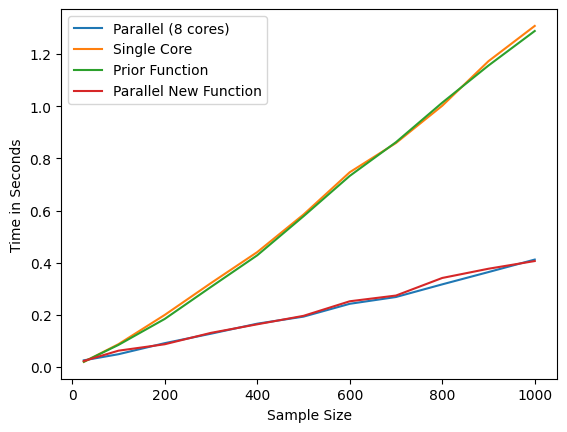

In [1435]:
t = timing.plot(x='Observations')
t.set_xlabel("Sample Size")
t.set_ylabel("Time in Seconds")

In [1324]:
dgms_train, dgms_test = train_test_split_sklearn(mnist, 'labels', train_size = 100)
xdgm0_train = dgms_train['zero_dim_rtl']
output0 = F_Image(xdgm0_train, PS=8, var=1, plot=False, training=True)
output0['F_Matrix'].shape

(100, 20)

In [1325]:
from persim import PersistenceImager
pers_imager = PersistenceImager()
pers_imager.fit(xdgm0_train)
pers_imager.pixel_size = 1
outputn = np.array(pers_imager.transform(xdgm0_train))
output1 = pers_reshape(outputn)

In [1326]:
print(pers_imager)

PersistenceImager(birth_range=(0.0, 26.0), pers_range=(1.0, 35.0), pixel_size=1, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})


<Axes: xlabel='birth', ylabel='persistence'>

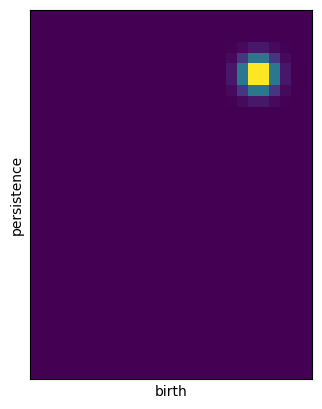

In [1327]:
pers_imager.plot_image(outputn[0])

In [10]:
def reshape_persistence_diagrams(dgm):
    dgm_reshape = np.array([])
    num_dgms = len(dgm)
    for i in range(0,num_dgms):
        t = np.repeat(i, len(dgm[i]))
        t = t.reshape(len(dgm[i]),1)
        t1 = np.concatenate((t,dgm[i]),1)
        if i == 0:
            dgm_reshape = t1
        else:
            dgm_reshape = np.append(dgm_reshape, t1, 0)
    dummy = np.zeros((num_dgms))
    return dgm_reshape, num_dgms, dummy

In [13]:
dgm_reshape, num_dgms, dummy = reshape_persistence_diagrams(dgms_3_train)

Write New Function

In [11]:
from numba import jit
@jit(nopython=True)
def mult(A, B):
    n = A.shape[0]
    m = B.shape[1]
    r = B.shape[0]
    result = np.zeros((n,m))
    for i in range(0,n):
        for j in range(0,m):
            for k in range(0,r):
                result[i,j]+=A[i,k]*B[k,j]
    return(result)

@jit(nopython=True)
def birth_persistence(Xdgms):
    birth = Xdgms[:,1]
    death = Xdgms[:,2]
    persistence = Xdgms[:,2] - Xdgms[:,1]
    diagram = Xdgms[:,0]
    return birth, death, persistence, diagram

@jit(nopython=True)
def gaussianpdf(mean = np.array([[0,0]], dtype=float), point = np.array([[0,0]], dtype=float), sigma=np.array([[2,0],[0,2]], dtype=float)):
    exponent = mult(mult((mean-point), np.linalg.inv(sigma)), np.transpose(mean-point))
    denominator = np.sqrt(np.power((2*pi),2)*np.linalg.det(sigma))
    distribution = 1/denominator*np.exp(-1/2*exponent)
    return distribution

@jit(nopython=True)
def feature_intervals(birth, persistence, x_pixel_size=1, y_pixel_size = 1):
    x_start = np.min(birth)
    y_start = np.min(persistence)
    x_end = np.max(birth)
    y_end = np.max(persistence)
    x_length = x_end - x_start + x_pixel_size
    n = int(np.ceil(x_length/x_pixel_size))
    x_intervals = np.zeros((n,1))
    x_intervals[0] = x_start
    for i in range(1,n):
        x_intervals[i] = x_intervals[i-1]+x_pixel_size
    x_factor = x_intervals[n-1] - x_end
    x_intervals = x_intervals - x_factor/2
    y_length = y_end - y_start + y_pixel_size
    m = int(np.ceil(y_length/y_pixel_size))
    y_intervals = np.zeros((m,1))
    y_intervals[0] = y_start
    for i in range(1,m):
        y_intervals[i] = y_intervals[i-1]+y_pixel_size
    y_factor = y_intervals[m-1] - y_end
    y_intervals = y_intervals - y_factor/2
    
    return x_intervals, y_intervals

@jit(nopython=True)
def pers_images(diagram, birth, persistence, x_intervals, y_intervals, num_dgms, sigma=np.array([[2,0],[0,2]], dtype=float)):
    n = len(x_intervals)
    m = len(y_intervals)
    persistence_images = np.zeros((num_dgms,(n-1)*(m-1)))
    plot_size = np.array([n-1,m-1])
    for i in range(1,n):
        for j in range(1,m):
            x = (x_intervals[i] + x_intervals[i-1])/2
            y = (y_intervals[j] + y_intervals[j-1])/2
            x_len = x_intervals[i] - x_intervals[i-1]
            y_len = y_intervals[j] - y_intervals[j-1]
            for k in range(0,num_dgms):
                #diagrams = np.transpose(np.array([diagram, birth, persistence]))
                index = np.where(diagram==k)[0]
                means = np.stack((birth, persistence), axis=1)
                for l in index:
                    mvmeans = np.array([[means[l, :][0],means[l, :][1]]])
                    point = np.array([[x[0],y[0]]])
                    area = float(y_len[0]*x_len[0])
                    value = gaussianpdf(mean=mvmeans, point=point, sigma=sigma)*y*area
                    persistence_images[k,j-1+(m-1)*(i-1)] = persistence_images[k,j-1+(m-1)*(i-1)] + value[0][0]
    return persistence_images, plot_size

@jit(nopython=True)
def persistenceImageFeatures(birth, persistence, diagram, num_dgms, xps=2, yps=2):
    x_intervals, y_intervals = feature_intervals(birth, persistence, x_pixel_size = xps, y_pixel_size = yps)
    t, plot_size = pers_images(diagram, birth, persistence, x_intervals, y_intervals, num_dgms)
    return t, plot_size


In [16]:
dgms_3_train = np.array(dgms_3[0:25])
dgm_reshape, num_dgms, dummy = reshape_persistence_diagrams(dgms_3_train)
birth, death, persistence, diagram= birth_persistence(dgm_reshape)
x_intervals, y_intervals = feature_intervals(birth, persistence, x_pixel_size = 1, y_pixel_size = 1)
t, plot_size = pers_images(diagram, birth, persistence, x_intervals, y_intervals, num_dgms)

In [17]:
%timeit t, plot_size = persistenceImageFeatures(birth, persistence, diagram, num_dgms, xps=1, yps=1)
%timeit output0 = F_Image(dgms_3[0:25], PS=1, var=2, plot=False, training=True)

1.03 s ± 5.66 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.3 ms ± 63.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
output0 = F_Image(xdgm0_train[0:10], PS=1, var=2, plot=False, training=True)
t, plot_size = persistenceImageFeatures(birth, persistence, diagram, num_dgms, xps=1, yps=1)

<Axes: xlabel='birth', ylabel='persistence'>

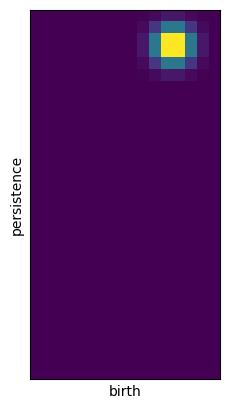

In [19]:
from persim import PersistenceImager
pers_imager = PersistenceImager()
pers_imager.fit(xdgm0_train[0:10])
pers_imager.pixel_size = 1
outputn = np.array(pers_imager.transform(xdgm0_train[0:10]))
pers_imager.plot_image(outputn[0])

<Axes: xlabel='birth', ylabel='persistence'>

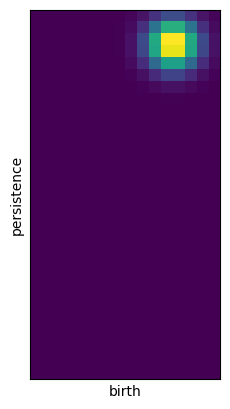

In [20]:
pers_imager.plot_image(np.reshape(t[0], plot_size))

In [ ]:
import time
import multiprocessing
cpu_count = multiprocessing.cpu_count()
pers_imager = PersistenceImager()
pers_imager.pixel_size = 1
pers_imager.kernel_params = {'sigma': 2}
seed = [0,1,2,3,4]
train_size = [25, 50] #100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
n = len(train_size)
timing = np.zeros((n,4))
for i in range(0,n):
    for j in seed:
        print("Seed is: ", j)
        dgms_train = dgms_10[0:train_size[i]]
        xdgm0_train = np.array(dgms_train)
        timing[i,0] += len(xdgm0_train)
        print("Done with sampling")

        start = time.time()
        dgm_reshape, num_dgms, dummy = reshape_persistence_diagrams(xdgm0_train)
        print('reshaped')
        birth, death, persistence, diagram= birth_persistence(dgm_reshape)
        x_intervals, y_intervals = feature_intervals(birth, persistence, x_pixel_size = 1, y_pixel_size = 1)
        t, plot_size = pers_images(diagram, birth, persistence, x_intervals, y_intervals, num_dgms)
        timing[i,1] +=end
        print("Done with New")

        start = time.time()
        output = F_Image_parallel(xdgm0_train, PS=.1, var=1, plot=False, training=True)
        end = time.time()-start
        timing[i,2] +=end
        print("Done with serial")

        start = time.time()
        output = F_Image(xdgm0_train, PS=.1, var=1, plot=False, training=True)
        end = time.time()-start
        timing[i,3] +=end
        print("Done with original")

    print("Finished Training ", i)
timing = pd.DataFrame(timing/5)
timing.columns=['Observations', 'New Function', 'Single Core', 'Prior Function']
print(timing)

Seed is:  0
Done with sampling


: 

In [19]:
import time
import multiprocessing
cpu_count = multiprocessing.cpu_count()
pers_imager = PersistenceImager()
pers_imager.pixel_size = 1
pers_imager.kernel_params = {'sigma': 2}
seed = [0,1,2,3,4]
train_size = [25, 50] #100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
n = len(train_size)
timing = np.zeros((n,4))
for i in range(0,n):
    for j in seed:
        print("Seed is: ", j)
        dgms_train = dgms_10[0:train_size[i]]
        xdgm0_train = np.array(dgms_train)
        timing[i,0] += len(xdgm0_train)
        print("Done with sampling")

        start = time.time()
        dgm_reshape, num_dgms, dummy = reshape_persistence_diagrams(xdgm0_train)
        birth, death, persistence, diagram= birth_persistence(dgm_reshape)
        x_intervals, y_intervals = feature_intervals(birth, persistence, x_pixel_size = 1, y_pixel_size = 1)
        t, plot_size = pers_images(diagram, birth, persistence, x_intervals, y_intervals, num_dgms)
        end = time.time()-start
        timing[i,1] +=end
        print("Done with New")

        start = time.time()
        output = F_Image_parallel(xdgm0_train, PS=.1, var=1, plot=False, training=True)
        end = time.time()-start
        timing[i,2] +=end
        print("Done with serial")

        start = time.time()
        output = F_Image(xdgm0_train, PS=.1, var=1, plot=False, training=True)
        end = time.time()-start
        timing[i,3] +=end
        print("Done with original")

    print("Finished Training ", i)
timing = pd.DataFrame(timing/5)
timing.columns=['Observations', 'New Function', 'Single Core', 'Prior Function']
print(timing)

Seed is:  0
Done with sampling
reshaped
Done with New
Done with serial
Done with original
Seed is:  1
Done with sampling
reshaped
Done with New
Done with serial
Done with original
Seed is:  2
Done with sampling
reshaped
Done with New
Done with serial
Done with original
Seed is:  3
Done with sampling
reshaped
Done with New
Done with serial
Done with original
Seed is:  4
Done with sampling
reshaped
Done with New
Done with serial
Done with original
Finished Training  0
Seed is:  0
Done with sampling
reshaped
Done with New
Done with serial
Done with original
Seed is:  1
Done with sampling
reshaped
Done with New
Done with serial
Done with original
Seed is:  2
Done with sampling
reshaped
Done with New
Done with serial
Done with original
Seed is:  3
Done with sampling
reshaped
Done with New
Done with serial
Done with original
Seed is:  4
Done with sampling
reshaped
Done with New
Done with serial
Done with original
Finished Training  1
   Observations  New Function  Single Core  Prior Function

Text(0, 0.5, 'Time in Seconds')

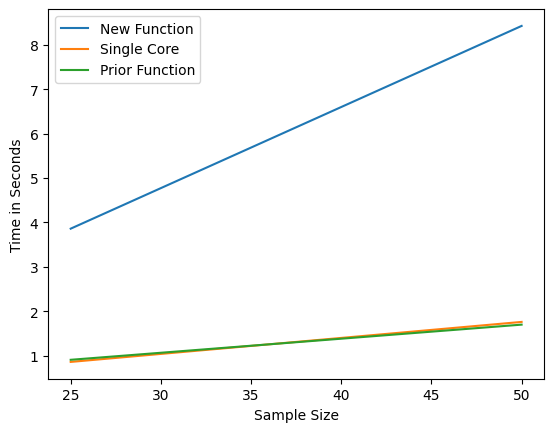

In [20]:
t = timing.plot(x='Observations')
t.set_xlabel("Sample Size")
t.set_ylabel("Time in Seconds")